# Definitions from US Energy Information Administration (EIA)
### Primary energy 
Energy in the form that it is first accounted for in a statistical energy balance, before any transformation to secondary or tertiary forms of energy. For example, coal can be converted to synthetic gas, which can be converted to electricity; in this example, coal is primary energy, synthetic gas is secondary energy, and electricity is tertiary energy. See Primary energy production and Primary energy consumption.

### Primary energy consumption 
Consumption of primary energy. 

### Primary energy production
Production of primary energy. 

### Primary fuels
Fuels that can be used continuously. They can sustain the boiler sufficiently for the production of electricity.

#### source: https://www.eia.gov/opendata/qb.php?category=0
----------------------------------------------------------------------

### In command line interface
- pip install EIA-python
- pip install numpy
- pip install pandas
- pip install requests

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from config import api_key
import eia
import re
from sklearn.linear_model import LinearRegression


In [2]:
#test is api_key variable works
#remove this line output when making public
api_key

'021bf1d89256205c8528b6d4475485b3'

In [3]:
#save variable to call in api data w/ key
api = eia.API(api_key)

In [4]:
#save all relevant api endings as an iterable object
series=['TOTAL.TEICBUS.M','TOTAL.TERCBUS.M','TOTAL.TEACBUS.M','TOTAL.TXCCBUS.M','TOTAL.TXEIBUS.M','TOTAL.TXICBUS.M','TOTAL.TXRCBUS.M','TOTAL.TXACBUS.M','TOTAL.TETCBUS.M']

In [5]:
#test one api ending; import to pandas dataframe
newdf=api.data_by_series(series='TOTAL.TECCBUS.M')
dataframe1=pd.DataFrame(newdf)
dataframe1.head()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
1973 01,1079.310
1973 02,1001.920
1973 03,884.437
1973 04,735.461
1973 05,696.114


In [6]:
import datetime
from datetime import date

In [7]:
datetime.date(2011, 3, 1)

datetime.date(2011, 3, 1)

In [8]:
#iterate through api endings and save to above dataframe
for x in series:
    series_search = api.data_by_series(series=x)
    df = pd.DataFrame(series_search)
    dataframe1=dataframe1.join(df, how="outer")


In [9]:
#print all data in df
dataframe1.head()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265
1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709
1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198
1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336
1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551


In [10]:
#add index (unique identifier)
dataframe1=dataframe1.reset_index()
dataframe1=dataframe1.rename(columns={"index":"Time"})
dataframe1.head()

,Time,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
0,1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265
1,1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709
2,1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198
3,1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336
4,1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551


In [11]:
#call on first item using index 
dataframe1["Time"][0]

'1973 01 '

In [12]:
#split time calumn into separate year and month (test on first line)
year = re.findall('....', (dataframe1['Time'][0]))[0]
month = re.findall('....', (dataframe1['Time'][0]))[1]

print(f"year = {year}")
print(f"month = {month}")

year = 1973
month =  01 


In [13]:
#create empty lists for future month and year columns
year = []
month = []
counter = 0

In [14]:
#iterate to split all time columns into year/month; add to respective list
for time in dataframe1['Time']:
    year.append(re.findall('....', (dataframe1['Time'][counter]))[0])
    month.append(re.findall('....', (dataframe1['Time'][counter]))[1])
    counter = counter + 1


In [15]:
#add month and year columns to df
dataframe1['Year'] = year
dataframe1['Month'] = month

In [16]:
dataframe1.head()

,Time,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)",Year,Month
0,1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265,1973,01
1,1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709,1973,02
2,1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198,1973,03
3,1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336,1973,04
4,1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551,1973,05


In [43]:
energy_consumption_df = dataframe1[["Year", "Month", "Total Primary Energy Consumption, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)"]]

# "Total Primary Energy Consumption, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)"

energy_consumption_df.head()

,Year,Month,"Total Primary Energy Consumption, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)"
0,1973,01,7226.265,656.607,2054.675,1313.816,1506.380
1,1973,02,6594.709,621.766,1869.459,1150.011,1439.361
2,1973,03,6524.198,490.154,1944.295,970.362,1561.162
3,1973,04,5944.336,362.003,1924.207,709.631,1479.971
4,1973,05,6074.551,289.109,2070.447,544.596,1621.585


In [44]:
energy_consumption_df.columns[0]

'Year'

In [45]:
datestamp_df = dataframe1[["Time", "Total Primary Energy Consumption, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)", "Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)"]]

datestamp_df.head()

,Time,"Total Primary Energy Consumption, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)"
0,1973 01,7226.265,656.607,2054.675,1313.816,1506.380
1,1973 02,6594.709,621.766,1869.459,1150.011,1439.361
2,1973 03,6524.198,490.154,1944.295,970.362,1561.162
3,1973 04,5944.336,362.003,1924.207,709.631,1479.971
4,1973 05,6074.551,289.109,2070.447,544.596,1621.585


In [46]:
#side note: api ending for CA monthly generation
#API CALL
#TO USEhttp://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.GEN.ALL-CA-99.M SERIES
#NAMENet generation : all fuels : California : all sectors : monthly
                

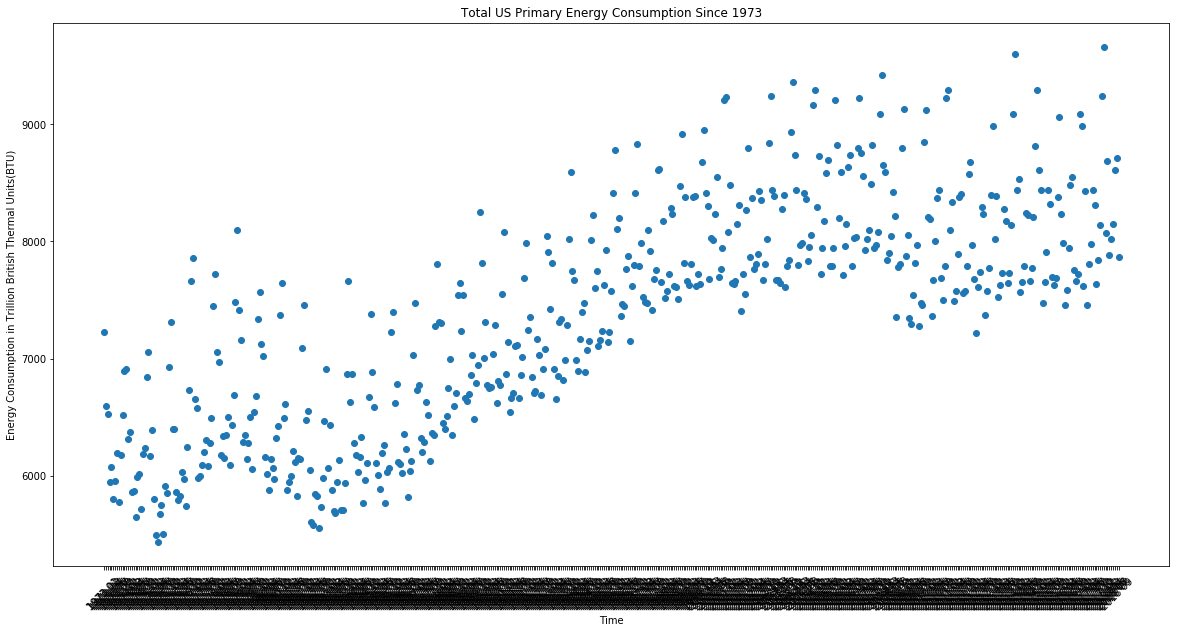

In [47]:
plt.figure(figsize=(20,10))
plt.title("Total US Primary Energy Consumption Since 1973")
plt.xlabel("Time")
plt.ylabel("Energy Consumption in Trillion British Thermal Units(BTU)")
plt.xticks(rotation=45)
plt.scatter(datestamp_df['Time'], datestamp_df['Total Primary Energy Consumption, Monthly (Trillion Btu)'], )




In [21]:
# line plot of monthly data

#plt.figure(figsize=(20,10))
#plt.title("Total US Primary Energy Consumption Since 1973")
#plt.xlabel("Time")
#plt.ylabel("Energy Consumption in Trillion British Thermal Units(BTU)")
#plt.xticks(rotation=45)
#plt.plot(datestamp_df['Time'], datestamp_df['Total Primary Energy Consumption, Monthly (Trillion Btu)'], )

In [54]:
# reshape x data into an array
X = energy_consumption_df.as_matrix(columns=energy_consumption_df.columns[:2])



/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [154]:
energy_consumption_df.columns[:2]

Index(['Year', 'Month'], dtype='object')

In [70]:
# reshape y data into an array
y = energy_consumption_df.as_matrix(columns=energy_consumption_df.columns[2:3])



/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [56]:
print(X)

[['1973' ' 01 ']
 ['1973' ' 02 ']
 ['1973' ' 03 ']
 ...
 ['2018' ' 07 ']
 ['2018' ' 08 ']
 ['2018' ' 09 ']]


In [57]:
from numpy import shape

In [58]:
shape(X)

(549, 2)

In [71]:
shape(y)

(549, 1)

In [72]:
print(y)

[[7226.265]
 [6594.709]
 [6524.198]
 [5944.336]
 [6074.551]
 [5805.318]
 [5954.498]
 [6194.365]
 [5776.048]
 [6177.455]
 [6521.876]
 [6889.701]
 [6906.707]
 [6316.938]
 [6373.851]
 [5863.745]
 [5867.145]
 [5644.753]
 [5988.038]
 [6018.263]
 [5713.814]
 [6184.96 ]
 [6238.457]
 [6845.56 ]
 [7059.014]
 [6171.542]
 [6386.257]
 [5800.645]
 [5494.457]
 [5438.115]
 [5671.861]
 [5747.213]
 [5501.291]
 [5911.74 ]
 [5853.242]
 [6929.591]
 [7315.131]
 [6396.086]
 [6394.82 ]
 [5858.227]
 [5796.389]
 [5827.441]
 [6027.641]
 [5973.736]
 [5742.648]
 [6247.77 ]
 [6732.906]
 [7661.524]
 [7855.623]
 [6657.899]
 [6577.61 ]
 [5983.088]
 [6000.884]
 [6089.198]
 [6199.376]
 [6304.07 ]
 [6083.524]
 [6276.021]
 [6488.691]
 [7445.772]
 [7724.961]
 [7055.634]
 [6969.369]
 [6173.557]
 [6341.706]
 [6152.956]
 [6343.727]
 [6499.555]
 [6091.208]
 [6428.593]
 [6689.161]
 [7479.492]
 [8096.05 ]
 [7413.492]
 [7155.015]
 [6291.051]
 [6351.355]
 [6146.792]
 [6280.572]
 [6496.817]
 [6056.294]
 [6546.994]
 [6682.793]
 [73

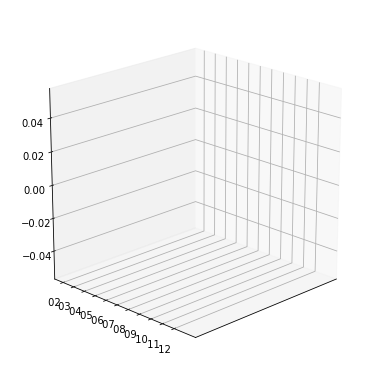

In [84]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1])
plt.show()

In [86]:
model = LinearRegression()

In [87]:
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.628486363058772


In [100]:
coef = model.coef_
coefyear = coef[0][0]
coefmonth = coef[0][1]
print(f"Year coefficient: {coefyear}")
print(f"Month coefficient: {coefmonth}")

Year coefficient: 56.22038404662587
Month coefficient: -28.57404279512682


In [102]:
y_int = model.intercept_[0] 
print(f"y-intercept: {y_int}")

y-intercept: -104614.31182577084


In [109]:
print(f"Y = mx + b formula")
print("---------------------")
print(f"Usage = {coefyear}*year {coefmonth}*month {y_int}")

Y = mx + b formula
---------------------
Usage = 56.22038404662587*year -28.57404279512682*month -104614.31182577084


In [118]:
X[200].reshape(1, -1)

array([['1989', ' 09 ']], dtype=object)

In [119]:
X[200]

array(['1989', ' 09 '], dtype=object)

In [132]:
print("actual value")
print(y[200])
print("predicted value")
print(model.predict([X[200]])[0])

actual value
[6484.541]
predicted value
[6950.86565781]


In [127]:
#model.predict([X[200]])[0]
X[200]

array(['1989', ' 09 '], dtype=object)

In [156]:
prediction = ['2020', '09']
prediction_array = np.asarray(prediction)
prediction_array

array(['2020', '09'], dtype='<U4')

In [159]:
prediction_array = prediction_array.astype(float)
prediction_array

array([2020.,    9.])

In [160]:
model.predict([prediction_array])

array([[8693.69756326]])

In [ ]:
#make plot better
#widen x axis
#add tickmark labels
#add axis labels
#add title
#make it in the right order?



#get more info on model-
#y=mx+b formula?
#what does r2 score mean?
#what is the p value

In [ ]:
# Arima model time series
#day of week as an input value
#holiday or not?
#create training of one set of time; test on some time in future